In [54]:
import numpy as np

np.random.seed(2342347) # random seed for consistency
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


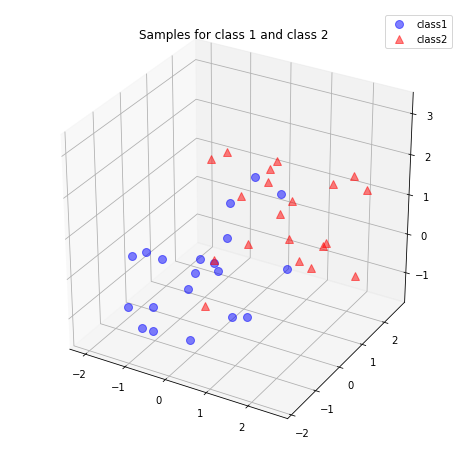

In [55]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

## Taking the whole dataset ignoring the class labels

In [20]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"
print(all_samples)

[[-0.29249497  0.26420068 -0.90867382 -2.05888574  1.05285551  0.18091616
   0.82849393 -1.19309725  0.59451453  0.20395804 -0.25859823 -1.48157613
  -1.14009767 -1.17438419 -0.38137422 -0.7284438  -0.26889666 -1.95468842
  -0.40844531  1.77475839  2.22537096  0.7580175   0.71389757  0.33031036
   2.59567267  0.63324884  1.6400377   1.77997172 -0.43984061 -0.28215235
   0.90177533  0.28022956  0.51248383  0.82413868  1.58846484  0.83338641
  -0.31122015  2.23259972  1.80192987  1.76225185]
 [ 0.43157037 -1.39370766 -1.62563805 -0.22151187  1.04378043  0.02509786
   1.14162149 -1.68140798 -0.45645483 -1.52091286  0.86664594  0.05971542
  -0.85100658 -0.82444591  2.10271396  0.41136456  0.23481557  0.156723
  -0.57881306 -1.82669363  0.46945345  1.74006434  1.31414202  0.34409388
   1.66729865  0.12561935  1.04991722  1.41343149  0.12261497  0.25731125
   1.82207444  1.90681305  1.2026231  -1.01117726  2.0036274   0.57603176
   0.20471219  1.90676671 -0.18380043  2.61545698]
 [-0.5696039

## Computing the d-dimensional mean vector

In [21]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.32576538]
 [ 0.37601327]
 [ 0.33054809]]


## Computing the Covariance Matrix 

In [23]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.36790829  0.5946331   0.55037625]
 [ 0.5946331   1.35388385  0.450125  ]
 [ 0.55037625  0.450125    1.31086216]]


## Computing eigenvectors and corresponding eigenvalues

In [26]:
# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(80 * '-')

Eigenvector 1: 
[[ 0.6131328 ]
 [ 0.57507225]
 [ 0.54162726]]
Eigenvalue 1 from covariance matrix: 2.411818796693034
--------------------------------------------------------------------------------
Eigenvector 2: 
[[ 0.78845466]
 [-0.48805716]
 [-0.37435206]]
Eigenvalue 2 from covariance matrix: 0.738513278853852
--------------------------------------------------------------------------------
Eigenvector 3: 
[[-0.04906558]
 [-0.65657606]
 [ 0.75266224]]
Eigenvalue 3 from covariance matrix: 0.8823222218987856
--------------------------------------------------------------------------------


## Checking the eigenvector-eigenvalue calculation

In [30]:
for i in range(len(eig_val_cov)):
    eigv = eig_vec_cov[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(cov_mat.dot(eigv), eig_val_cov[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

## Visualizing the eigenvectors

Populating the interactive namespace from numpy and matplotlib


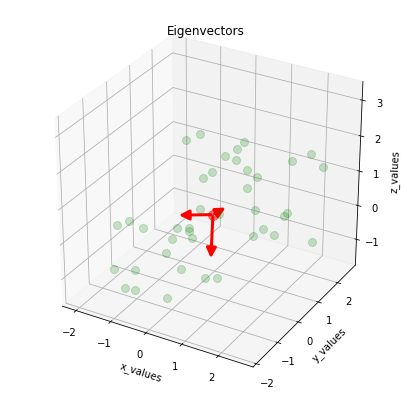

In [32]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_cov.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

## Sorting the eigenvectors by decreasing eigenvalues

In [36]:
for ev in eig_vec_cov:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

2.41181879669
0.882322221899
0.738513278854


## Choosing k eigenvectors with the largest eigenvalues

In [37]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.6131328  -0.04906558]
 [ 0.57507225 -0.65657606]
 [ 0.54162726  0.75266224]]


## Transforming the samples onto the new subspace

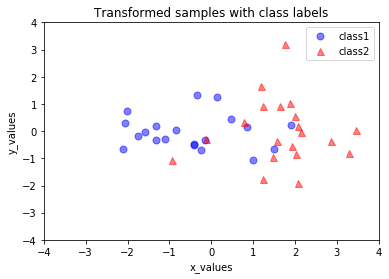

In [39]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()